In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm


from datetime import datetime
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import (Exchangeable,Independence,Autoregressive)
from statsmodels.genmod.families import Poisson
from statsmodels.formula.api import poisson
from statsmodels.formula.api import negativebinomial

%matplotlib inline

In [2]:
keywords = ['Date','A','B','C','D','E','F','G','H','I','J','K','Count']

train = pd.read_csv("training_set.csv", header=None, delimiter = ";", names = keywords)
train['Date'] = pd.to_datetime(train['Date'], infer_datetime_format=True)
#train.set_index('Date', inplace=True)

train.head()

,Date,A,B,C,D,E,F,G,H,I,J,K,Count
0,2009-01-05,14.0,3.0,3.0,9.0,55.0,0.0,0.0,19.0,41.0,16.0,24.0,9
1,2009-01-12,13.0,0.0,3.0,4.0,43.0,0.0,0.0,19.0,37.0,12.0,19.0,15
2,2009-01-19,13.0,1.0,8.0,6.0,32.0,1.0,0.0,19.0,44.0,5.0,31.0,20
3,2009-01-26,17.0,2.0,17.0,4.0,59.0,2.0,0.0,22.0,40.0,8.0,15.0,51
4,2009-02-02,15.0,3.0,3.0,5.0,58.0,0.0,0.0,28.0,41.0,5.0,27.0,51


In [3]:
m1 = poisson('Count ~ A+B+C+D+E+F+G+H+I+J+K', data = train).fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 21.412152
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                  Count   No. Observations:                  282
Model:                        Poisson   Df Residuals:                      270
Method:                           MLE   Df Model:                           11
Date:                Sun, 15 Sep 2019   Pseudo R-squ.:                  0.4634
Time:                        21:34:01   Log-Likelihood:                -6038.2
converged:                       True   LL-Null:                       -11253.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9451      0.034     87.812      0.000       2.879       3.011
A             -0.0073      0.003     -2.395      0.017      -0.013      -0.001
B             -0.0305      0.008     -3.766      0.000      -0.046      -0.015
C             -0.0052      0.001     -5.222      0.000      -0.007      -0.003
D              0.0960      0.004     26.829      0.000       0.089       0.103
E              0.0304      0.001     26.875      0.000       0.028       0.033
F             -0.0589      0.009     -6.514      0.000      -0.077      -0.041
G              0.0997      0.018      5.489      0.000       0.064       0.135
H             -0.0279      0.002    -11.823      0.000      -0.033      -0.023
I             -0.0082      0.002     -5.019      0.000      -0.011      -0.005
J             -0.0050      0.001     -5.251      0.000      -0.007      -0.003
K             -0.0103      0.002     -4.352      0.000      -0.015      -0.006
==============================================================================
"""

In [4]:

model_fit1 = train
preds_1 = m1.predict()
model_fit1['preds'] = preds_1

model_fit1.head()

,Date,A,B,C,D,E,F,G,H,I,J,K,Count,preds
0,2009-01-05,14.0,3.0,3.0,9.0,55.0,0.0,0.0,19.0,41.0,16.0,24.0,9,58.977948
1,2009-01-12,13.0,0.0,3.0,4.0,43.0,0.0,0.0,19.0,37.0,12.0,19.0,15,31.052847
2,2009-01-19,13.0,1.0,8.0,6.0,32.0,1.0,0.0,19.0,44.0,5.0,31.0,20,20.720313
3,2009-01-26,17.0,2.0,17.0,4.0,59.0,2.0,0.0,22.0,40.0,8.0,15.0,51,36.390909
4,2009-02-02,15.0,3.0,3.0,5.0,58.0,0.0,0.0,28.0,41.0,5.0,27.0,51,34.834253


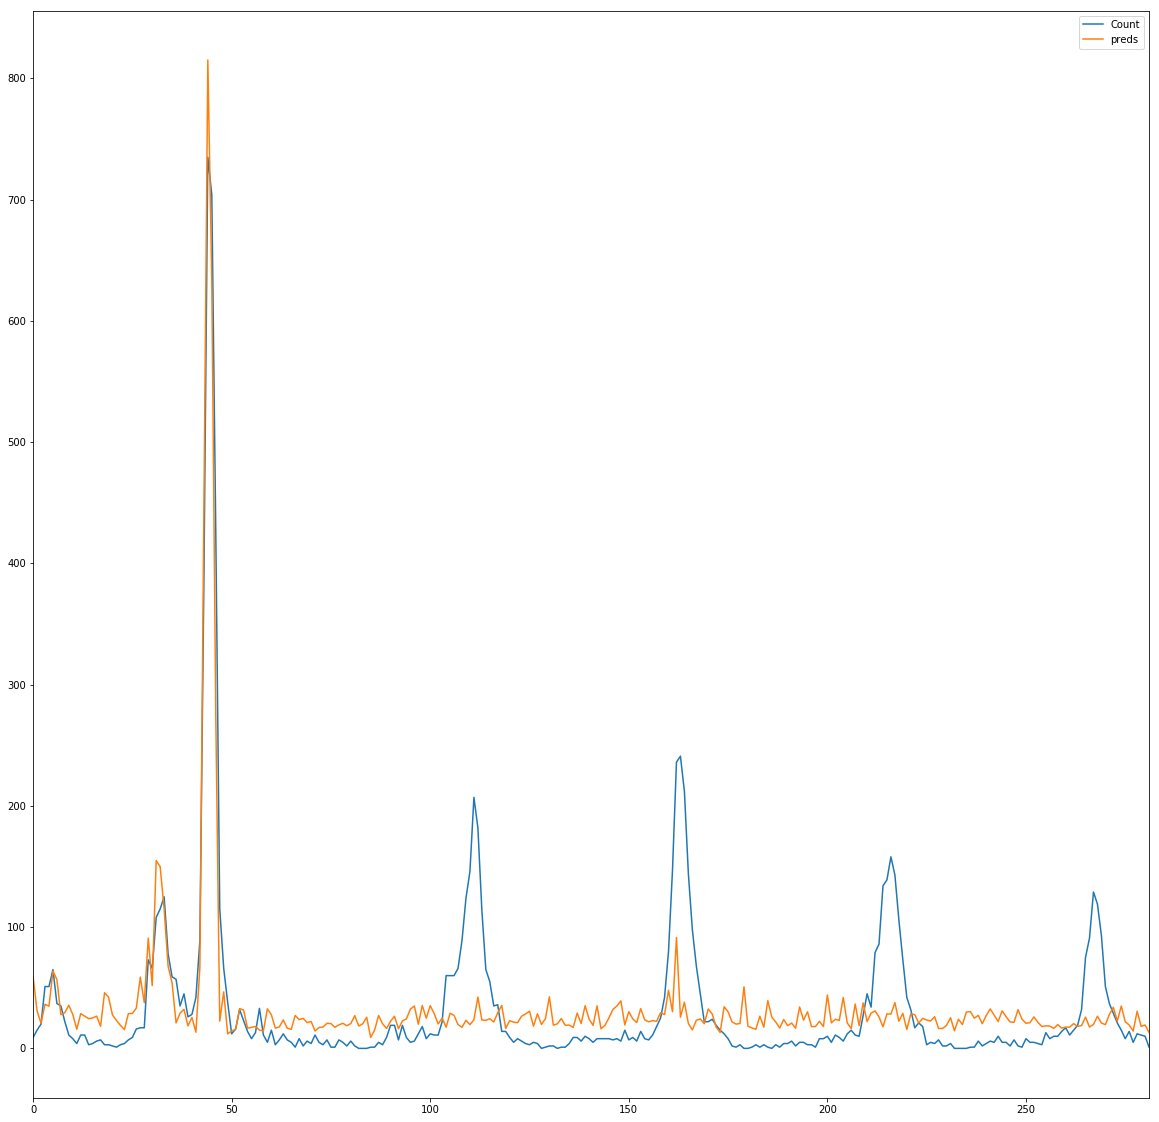

In [5]:
from pandas import DataFrame
plt.rcParams['figure.figsize']=(20,20)

df = DataFrame(train,columns=['Count','preds'])
df.plot(kind = 'line')


In [6]:
m_nb = negativebinomial('Count ~ A+B+C+D+E+F+G+H+I+J+K', data = train).fit()
m_nb.summary()


Optimization terminated successfully.
         Current function value: 4.206614
         Iterations: 28
         Function evaluations: 44
         Gradient evaluations: 44


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:                  Count   No. Observations:                  282
Model:               NegativeBinomial   Df Residuals:                      270
Method:                           MLE   Df Model:                           11
Date:                Sun, 15 Sep 2019   Pseudo R-squ.:                 0.03993
Time:                        21:34:01   Log-Likelihood:                -1186.3
converged:                       True   LL-Null:                       -1235.6
                                        LLR p-value:                 3.280e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0424      0.210     14.519      0.000       2.632       3.453
A             -0.0013      0.018     -0.075      0.940      -0.036       0.034
B             -0.0440      0.051     -0.865      0.387      -0.144       0.056
C              0.0011      0.009      0.132      0.895      -0.016       0.018
D              0.0885      0.030      2.911      0.004       0.029       0.148
E              0.0211      0.009      2.307      0.021       0.003       0.039
F             -0.0854      0.083     -1.029      0.303      -0.248       0.077
G              0.0004      0.156      0.002      0.998      -0.305       0.306
H             -0.0056      0.019     -0.294      0.769      -0.043       0.032
I             -0.0224      0.013     -1.741      0.082      -0.048       0.003
J              0.0018      0.010      0.178      0.858      -0.018       0.022
K             -0.0027      0.016     -0.166      0.868      -0.035       0.029
alpha          1.4759      0.115     12.794      0.000       1.250       1.702
==============================================================================
"""

In [7]:
m_nb = negativebinomial('Count ~ A+B+C+D+E+F+G+H+I+J+K', data = train).fit()
m_nb.summary()

Optimization terminated successfully.
         Current function value: 4.206614
         Iterations: 28
         Function evaluations: 44
         Gradient evaluations: 44


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:                  Count   No. Observations:                  282
Model:               NegativeBinomial   Df Residuals:                      270
Method:                           MLE   Df Model:                           11
Date:                Sun, 15 Sep 2019   Pseudo R-squ.:                 0.03993
Time:                        21:34:02   Log-Likelihood:                -1186.3
converged:                       True   LL-Null:                       -1235.6
                                        LLR p-value:                 3.280e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0424      0.210     14.519      0.000       2.632       3.453
A             -0.0013      0.018     -0.075      0.940      -0.036       0.034
B             -0.0440      0.051     -0.865      0.387      -0.144       0.056
C              0.0011      0.009      0.132      0.895      -0.016       0.018
D              0.0885      0.030      2.911      0.004       0.029       0.148
E              0.0211      0.009      2.307      0.021       0.003       0.039
F             -0.0854      0.083     -1.029      0.303      -0.248       0.077
G              0.0004      0.156      0.002      0.998      -0.305       0.306
H             -0.0056      0.019     -0.294      0.769      -0.043       0.032
I             -0.0224      0.013     -1.741      0.082      -0.048       0.003
J              0.0018      0.010      0.178      0.858      -0.018       0.022
K             -0.0027      0.016     -0.166      0.868      -0.035       0.029
alpha          1.4759      0.115     12.794      0.000       1.250       1.702
==============================================================================
"""

In [8]:


model_fit2 = train
preds_2 = m_nb.predict()
model_fit2['preds'] = preds_2

model_fit2.head()

,Date,A,B,C,D,E,F,G,H,I,J,K,Count,preds
0,2009-01-05,14.0,3.0,3.0,9.0,55.0,0.0,0.0,19.0,41.0,16.0,24.0,9,44.208411
1,2009-01-12,13.0,0.0,3.0,4.0,43.0,0.0,0.0,19.0,37.0,12.0,19.0,15,27.737638
2,2009-01-19,13.0,1.0,8.0,6.0,32.0,1.0,0.0,19.0,44.0,5.0,31.0,20,18.952107
3,2009-01-26,17.0,2.0,17.0,4.0,59.0,2.0,0.0,22.0,40.0,8.0,15.0,51,27.961191
4,2009-02-02,15.0,3.0,3.0,5.0,58.0,0.0,0.0,28.0,41.0,5.0,27.0,51,30.500391


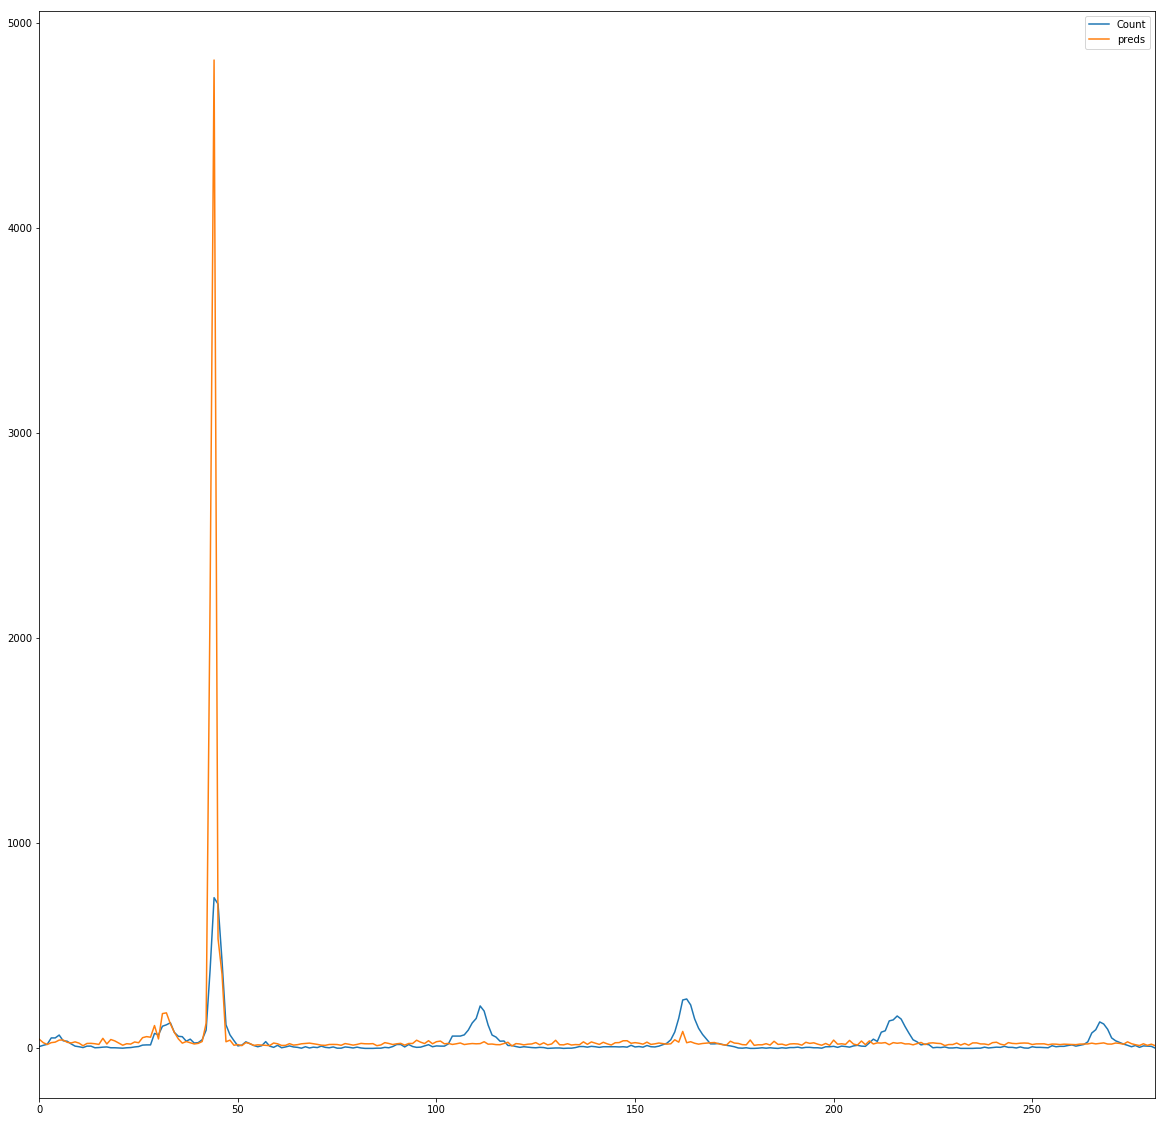

In [9]:
plt.rcParams['figure.figsize']=(20,20)

df2 = DataFrame(train,columns=['Count','preds'])
df2.plot(kind = 'line')


In [10]:
keywords2 = ['Date','A','B','C','D','E','F','G','H','I','J','K','Count']

test = pd.read_csv("test_set.csv", header=None, delimiter = ";", names = keywords2)
test['Date'] = pd.to_datetime(test['Date'], infer_datetime_format=True)
#train.set_index('Date', inplace=True)

test.head()

,Date,A,B,C,D,E,F,G,H,I,J,K,Count
0,2014-06-02,9.0,2.0,2.0,0.0,11.0,1.0,0.0,10.0,15.0,6.0,1.0,NaN
1,2014-06-09,10.0,1.0,3.0,4.0,16.0,0.0,0.0,7.0,46.0,2.0,4.0,NaN
2,2014-06-16,6.0,2.0,0.0,1.0,10.0,0.0,0.0,8.0,20.0,1.0,4.0,NaN
3,2014-06-23,28.0,1.0,4.0,2.0,8.0,0.0,0.0,5.0,17.0,9.0,3.0,NaN
4,2014-06-30,8.0,4.0,0.0,1.0,13.0,0.0,0.0,3.0,12.0,5.0,7.0,NaN


In [11]:
test = test.fillna(0)
test.head()

,Date,A,B,C,D,E,F,G,H,I,J,K,Count
0,2014-06-02,9.0,2.0,2.0,0.0,11.0,1.0,0.0,10.0,15.0,6.0,1.0,0.0
1,2014-06-09,10.0,1.0,3.0,4.0,16.0,0.0,0.0,7.0,46.0,2.0,4.0,0.0
2,2014-06-16,6.0,2.0,0.0,1.0,10.0,0.0,0.0,8.0,20.0,1.0,4.0,0.0
3,2014-06-23,28.0,1.0,4.0,2.0,8.0,0.0,0.0,5.0,17.0,9.0,3.0,0.0
4,2014-06-30,8.0,4.0,0.0,1.0,13.0,0.0,0.0,3.0,12.0,5.0,7.0,0.0


In [14]:

model_fit3 = train
preds_3 = m_nb.predict()
model_fit3['Countss'] = preds_3

model_fit3.head()

,Date,A,B,C,D,E,F,G,H,I,J,K,Count,preds,Countss
0,2009-01-05,14.0,3.0,3.0,9.0,55.0,0.0,0.0,19.0,41.0,16.0,24.0,9,44.208411,44.208411
1,2009-01-12,13.0,0.0,3.0,4.0,43.0,0.0,0.0,19.0,37.0,12.0,19.0,15,27.737638,27.737638
2,2009-01-19,13.0,1.0,8.0,6.0,32.0,1.0,0.0,19.0,44.0,5.0,31.0,20,18.952107,18.952107
3,2009-01-26,17.0,2.0,17.0,4.0,59.0,2.0,0.0,22.0,40.0,8.0,15.0,51,27.961191,27.961191
4,2009-02-02,15.0,3.0,3.0,5.0,58.0,0.0,0.0,28.0,41.0,5.0,27.0,51,30.500391,30.500391
